# NYC Schools Data Exploration
## This project is part of my starting career in Data Science
### Disclaimer: Unless otherwise mentioned, the project follow guided projects section from the DataQuest website. As an eductaional project.

#### Project Overview: Cleaningvarious datasets and merging them together in effort to find intersting correltions with SATscores. Data Retreived from: https://opendata.cityofnewyork.us/ which contains open source data about NYC

In [1]:
# Importing libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data=dict()

for f in data_files:
    df=pd.read_csv(f)
    data[f.replace('.csv','')]=df

for k in data:
    print(k,data[k].head(3))

ap_2010       DBN                    SchoolName AP Test Takers  Total Exams Taken  \
0  01M448  UNIVERSITY NEIGHBORHOOD H.S.              39                49   
1  01M450        EAST SIDE COMMUNITY HS              19                21   
2  01M515           LOWER EASTSIDE PREP              24                26   

  Number of Exams with scores 3 4 or 5  
0                                   10  
1                                    s  
2                                   24  
class_size    CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -     

#### DBN (Distrcit Bourough Number) is a unique number for each school in NYC, and is very fit to be group data around
#### SAT is only applicable to high school, so we are going to cut out other grades

In [3]:
#'DBN' at hs_directory is named 'dbn', going to change it 
data['hs_directory']['DBN']=data['hs_directory']['dbn']

#'DBN' in class size is 'CSD' + 'SCHOOL CODE'. Going to merge them

def padded_csd(num):
    str_num=str(num)
    if len(str_num)>1:
        return str_num
    else: 
        str_num.zfill(2)
        return str_num

data['class_size']['pcsd']=data['class_size']['CSD'].apply(padded_csd)
data['class_size']['DBN']=data['class_size']['pcsd']+data['class_size']['SCHOOL CODE']
data['class_size'].drop(['pcsd','CSD','SCHOOL CODE','BOROUGH'],axis=1)

,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,1M015
1,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,1M015
2,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,1M015
3,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,1M015
4,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,1M015
5,P.S. 015 Roberto Clemente,02,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,1M015
6,P.S. 015 Roberto Clemente,03,GEN ED,-,-,-,12.0,1.0,12.0,12.0,12.0,ATS,NaN,1M015
7,P.S. 015 Roberto Clemente,03,CTT,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,1M015
8,P.S. 015 Roberto Clemente,04,GEN ED,-,-,-,26.0,2.0,13.0,12.0,14.0,ATS,NaN,1M015
9,P.S. 015 Roberto Clemente,05,GEN ED,-,-,-,27.0,1.0,27.0,27.0,27.0,ATS,NaN,1M015


#### Reading additional text files

In [4]:
Survey_all=pd.read_csv('masterfile11_gened_final.txt',delimiter='\t',encoding='windows-1252')
Survey_d75=pd.read_csv('masterfile11_d75_final.txt',delimiter='\t',encoding='windows-1252')
survey=pd.concat([Survey_all,Survey_d75],axis=0)


In [5]:
# timming the columns and changing 'dbn' to 'DBN'
survey['DBN']=survey['dbn']
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey=survey.loc[:,survey_fields] #to avoide multi-indexing
data['survey']=survey
data['survey'].head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


In [6]:
#### Turn SAT scores into integers
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data['sat_results'][c]=pd.to_numeric(data['sat_results'][c],errors='coerce')
data['sat_results']['SAT']=data['sat_results']['SAT Math Avg. Score']+data['sat_results']['SAT Critical Reading Avg. Score']+data['sat_results']['SAT Writing Avg. Score']


In [7]:
#finding schools locations
import re
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat
def find_lon(loc):
    coords = re.findall("\(.+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)
data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")
data["hs_directory"].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lon,lat
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,17K548,-73.961648,40.670299
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...,09X543,-73.904475,40.827603
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...,09X327,-73.916162,40.842414
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9.0,10,9.0,14.0,...,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",1.0,1.0,29.0,1001388.0,1.001130e+09,Chinatown ...,02M280,-74.000807,40.710679
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6.0,12,NaN,NaN,...,"160 20 Goethals Avenue\nJamaica, NY 11432\n(40...",8.0,24.0,1267.0,4539721.0,4.068580e+09,Pomonok-Flushing Heights-Hillcrest ...,28Q680,-73.806500,40.718810


In [8]:
#class_size contains data about all class for all grades, we do to boolean filtering for grades 9-12 and general education
class_size = data["class_size"]
class_size = class_size[(class_size["GRADE "] == "09-12") & (class_size["PROGRAM TYPE"] == "GEN ED")]

#We have no unique DBN in class_size
class_size=class_size.groupby('DBN').agg(np.mean) # find and use the mean of class sizes for each  unique DBN
class_size=class_size.reset_index(inplace=True) # we dont't want te index to be the DBN


In [9]:
#Interetsd in the lates years data only
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]


In [10]:
# Finding AB results correlation with SAT later on
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for c in cols:
    data['ap_2010'][c]=pd.to_numeric(data['ap_2010'][c],errors='coerce')
print(data["ap_2010"].dtypes)


DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


##### Merging datasets

In [21]:
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

print(combined.shape)

(6721, 175)


In [12]:
# A bit more cleaning
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)
combined.head()

,DBN,SCHOOL NAME_x,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lon,lat
0,10X141,RIVERDALE / KINGSBRIDGE ACADEMY (MIDDLE SCHOOL...,113,438.0,455.0,440.0,1333.0,MS/HS 141 D A STEIN RIV/KINGSB,133.0,184.0,...,0,"660 West 237 Street\nBronx, NY 10463\n(40.8883...",8.0,11.0,309.0,2085870.0,2.059180e+09,North Riverdale-Fieldston-Riverdale ...,-73.914093,40.888373
1,10X141,RIVERDALE / KINGSBRIDGE ACADEMY (MIDDLE SCHOOL...,113,438.0,455.0,440.0,1333.0,MS/HS 141 D A STEIN RIV/KINGSB,133.0,184.0,...,0,"660 West 237 Street\nBronx, NY 10463\n(40.8883...",8.0,11.0,309.0,2085870.0,2.059180e+09,North Riverdale-Fieldston-Riverdale ...,-73.914093,40.888373
2,10X141,RIVERDALE / KINGSBRIDGE ACADEMY (MIDDLE SCHOOL...,113,438.0,455.0,440.0,1333.0,MS/HS 141 D A STEIN RIV/KINGSB,133.0,184.0,...,0,"660 West 237 Street\nBronx, NY 10463\n(40.8883...",8.0,11.0,309.0,2085870.0,2.059180e+09,North Riverdale-Fieldston-Riverdale ...,-73.914093,40.888373
3,10X141,RIVERDALE / KINGSBRIDGE ACADEMY (MIDDLE SCHOOL...,113,438.0,455.0,440.0,1333.0,MS/HS 141 D A STEIN RIV/KINGSB,133.0,184.0,...,0,"660 West 237 Street\nBronx, NY 10463\n(40.8883...",8.0,11.0,309.0,2085870.0,2.059180e+09,North Riverdale-Fieldston-Riverdale ...,-73.914093,40.888373
4,10X141,RIVERDALE / KINGSBRIDGE ACADEMY (MIDDLE SCHOOL...,113,438.0,455.0,440.0,1333.0,MS/HS 141 D A STEIN RIV/KINGSB,133.0,184.0,...,0,"660 West 237 Street\nBronx, NY 10463\n(40.8883...",8.0,11.0,309.0,2085870.0,2.059180e+09,North Riverdale-Fieldston-Riverdale ...,-73.914093,40.888373


#### Now we have clean dataset, we can investigate each school sat

In [13]:
correlations = combined.corr()
correlations = correlations["SAT"].sort_values(ascending=False)
print(correlations)

SAT                                     1.000000
SAT Writing Avg. Score                  0.985107
SAT Critical Reading Avg. Score         0.984078
SAT Math Avg. Score                     0.969834
asian_per                               0.585796
white_per                               0.578215
AP Test Takers                          0.554912
Total Exams Taken                       0.549616
asian_num                               0.498724
Number of Exams with scores 3 4 or 5    0.479925
N_p                                     0.479600
N_s                                     0.465545
total_students                          0.463706
white_num                               0.455808
female_num                              0.438180
total_enrollment                        0.424755
male_num                                0.394471
Total Cohort                            0.393993
N_t                                     0.354571
saf_s_11                                0.352402
saf_t_11            

In [14]:
# We can see many correlations here, like how white and asians % increase SAT, while the opposite for black and hispanic

In [15]:
# Investigate safety scores

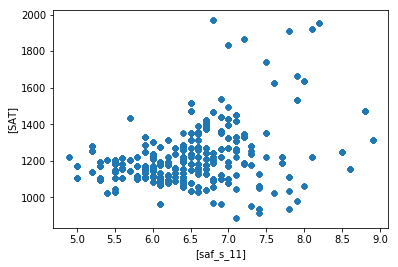

In [16]:
# saf_s_11 (students perception of safety)
combined.plot(kind='scatter',x=['saf_s_11'],y=['SAT'])

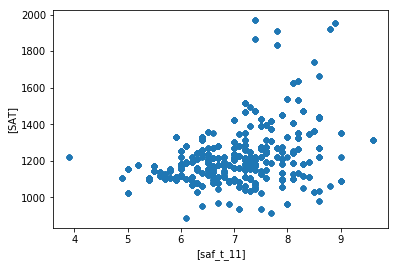

In [17]:
# saf_t_11 (teachers perception of safety)
combined.plot(kind='scatter',x=['saf_t_11'],y=['SAT'])

In [18]:
# The more schools is perceived safe, the higher the sat score

In [19]:
# Avergae Safety Score by District
def get_first_two_chars(dbn):
    return dbn[0:2]

district_t=combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
district_s=combined.groupby(["school_dist"]).agg(np.mean)[['saf_t_11','saf_s_11']]

In [20]:
import mpl_toolkits.basemap as Basemap

z = Basemap(projection='merc', llcrnrlat=40.496044, urcrnrlat=40.915256, llcrnrlon=-74.255735, urcrnrlon=-73.700272,resolution='i')

z.fillcontinents(color='white',lake_color='#85A6D9')
z.drawmapboundary(fill_color='#85A6D9')
z.drawcoastlines(color='#6D5F47', linewidth=.4)
z.drawrivers(color='#6D5F47', linewidth=.4)
lon=district_t['lon'].tolist()
lat=district_t['lat'].tolist()
z.scatter(lon,lat,zorder=2,camp='summer',s=55, c=districts_t["saf_t_11"])

TypeError: 'module' object is not callable

#### Plotting the relaton between race and SAT

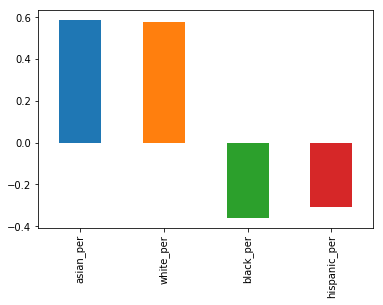

In [32]:
race=['asian_per','white_per','black_per','hispanic_per']
correlations[race].plot.bar()

#### Since Correlation means there might be a realtion, we do scatter plots

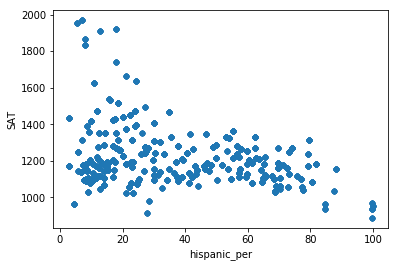

In [34]:
combined.plot(kind='scatter',x='hispanic_per',y='SAT')
# We can see clear correltions there

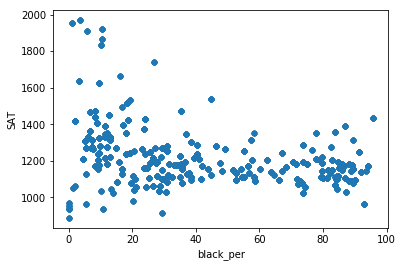

In [35]:
combined.plot(kind='scatter',x='black_per',y='SAT')
# We can see clear correltions there

#### Exploring the realtion between ginder and SAT

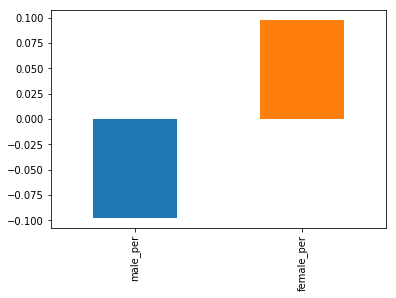

In [39]:
correlations[['male_per','female_per']].plot.bar()
# Females are better on SAT, they study harder maybe

#### Cleaning up the columns names

In [43]:
combined.columns.str.strip()

Index(['DBN', 'SCHOOL NAME_x', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'SAT', 'SchoolName', 'AP Test Takers',
       'Total Exams Taken',
       ...
       'priority10', 'Location 1', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA', 'lon', 'lat'],
      dtype='object', length=175)

#### Checking the percent AP test takers

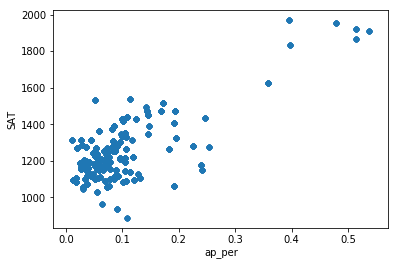

In [47]:
combined['ap_per']=combined['AP Test Takers ']/combined["total_enrollment"]
combined.plot(kind='scatter',x='ap_per',y='SAT')
#  Clear postive correlation